In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from stockstats import StockDataFrame as Sdf


In [54]:
dt = pd.read_csv('H4_EURUSD_parsed.csv')

In [55]:
dt = dt.tail(1000)

<Axes: >

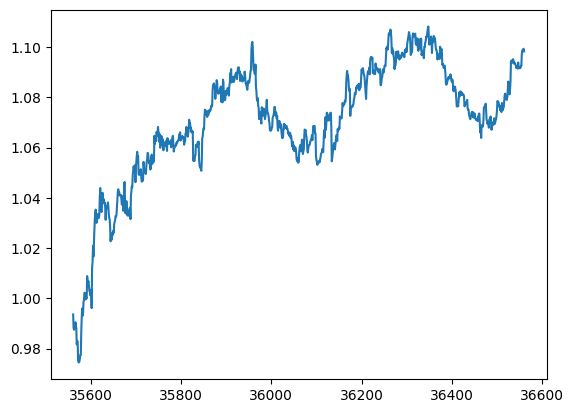

In [56]:
dt.close.plot()

In [21]:
stock = Sdf.retype(dt)

In [29]:
stock

,time,open,high,low,close
0,2000-01-01 02:00:00,1.00880,1.01060,1.00610,1.00620
1,2000-01-03 06:00:00,1.00730,1.01900,1.00730,1.01750
2,2000-01-03 10:00:00,1.01730,1.01810,1.01540,1.01570
3,2000-01-03 14:00:00,1.01540,1.01670,1.00930,1.01150
4,2000-01-03 18:00:00,1.01180,1.01180,1.00540,1.00730
...,...,...,...,...,...
36556,2023-06-22 02:00:00,1.09706,1.09908,1.09672,1.09856
36557,2023-06-22 06:00:00,1.09856,1.09924,1.09815,1.09886
36558,2023-06-22 10:00:00,1.09885,1.09951,1.09867,1.09872
36559,2023-06-22 14:00:00,1.09874,1.10038,1.09797,1.09930


In [16]:
stock['close_28_ema']

0        1.006200
1        1.012052
2        1.013356
3        1.012841
4        1.011569
           ...   
36556    1.091247
36557    1.091772
36558    1.092251
36559    1.092737
36560    1.093117
Name: close_28_ema, Length: 36561, dtype: float64

In [57]:
dt['diff']= stock['close_28_ema'] - stock['close_260_ema']

In [39]:
dt

,Time,open,high,low,close
0,2000-01-01 02:00:00,1.00880,1.01060,1.00610,1.00620
1,2000-01-03 06:00:00,1.00730,1.01900,1.00730,1.01750
2,2000-01-03 10:00:00,1.01730,1.01810,1.01540,1.01570
3,2000-01-03 14:00:00,1.01540,1.01670,1.00930,1.01150
4,2000-01-03 18:00:00,1.01180,1.01180,1.00540,1.00730
...,...,...,...,...,...
36556,2023-06-22 02:00:00,1.09706,1.09908,1.09672,1.09856
36557,2023-06-22 06:00:00,1.09856,1.09924,1.09815,1.09886
36558,2023-06-22 10:00:00,1.09885,1.09951,1.09867,1.09872
36559,2023-06-22 14:00:00,1.09874,1.10038,1.09797,1.09930


In [ ]:
# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()

In [58]:
# Create 20 days simple moving average column
dt['20_SMA'] = dt['close'].rolling(window = 10, min_periods = 1).mean()

# Create 50 days simple moving average column
dt['200_SMA'] = dt['close'].rolling(window = 60, min_periods = 1).mean()

dt.head()

,Time,open,high,low,close,diff,20_SMA,200_SMA
35561,2022-11-01 18:00:00,0.99340,0.99540,0.99234,0.99359,NaN,0.993590,0.993590
35562,2022-11-01 22:00:00,0.99360,0.99369,0.98531,0.98822,NaN,0.990905,0.990905
35563,2022-11-02 02:00:00,0.98820,0.98862,0.98708,0.98748,NaN,0.989763,0.989763
35564,2022-11-02 06:00:00,0.98741,0.98891,0.98693,0.98882,NaN,0.989528,0.989528
35565,2022-11-02 10:00:00,0.98880,0.98998,0.98788,0.98877,NaN,0.989376,0.989376


In [59]:
dt['diff']= dt['20_SMA'] - dt['200_SMA']

In [32]:
dt

,Time,open,high,low,close,diff,20_SMA,200_SMA
0,2000-01-01 02:00:00,1.0088,1.0106,1.0061,1.0062,0.000000,1.006200,1.006200
1,2000-01-03 06:00:00,1.0073,1.0190,1.0073,1.0175,0.000000,1.011850,1.011850
2,2000-01-03 10:00:00,1.0173,1.0181,1.0154,1.0157,0.000000,1.013133,1.013133
3,2000-01-03 14:00:00,1.0154,1.0167,1.0093,1.0115,0.000000,1.012725,1.012725
4,2000-01-03 18:00:00,1.0118,1.0118,1.0054,1.0073,0.000000,1.011640,1.011640
...,...,...,...,...,...,...,...,...
995,2000-08-21 22:00:00,0.9035,0.9048,0.9009,0.9016,-0.014486,0.911080,0.925566
996,2000-08-22 02:00:00,0.9017,0.9029,0.9008,0.9022,-0.014636,0.910665,0.925301
997,2000-08-22 06:00:00,0.9023,0.9027,0.9016,0.9017,-0.015042,0.910000,0.925042
998,2000-08-22 10:00:00,0.9018,0.9035,0.9013,0.9033,-0.015424,0.909370,0.924794


In [62]:
# create a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal as 1 else 0.
x=0.05
dt['Signal'] = 0.0  
dt['diff'] = dt['20_SMA'] - dt['200_SMA']
dt['Signal'] = np.where(dt['diff'] < x, 1.0, 0.0) 

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
dt['Position'] = dt['Signal'].diff()

# display the dataframe
dt.head(10)

,Time,open,high,low,close,diff,20_SMA,200_SMA,Signal,Position
35561,2022-11-01 18:00:00,0.99340,0.99540,0.99234,0.99359,0.0,0.993590,0.993590,1.0,NaN
35562,2022-11-01 22:00:00,0.99360,0.99369,0.98531,0.98822,0.0,0.990905,0.990905,1.0,0.0
35563,2022-11-02 02:00:00,0.98820,0.98862,0.98708,0.98748,0.0,0.989763,0.989763,1.0,0.0
35564,2022-11-02 06:00:00,0.98741,0.98891,0.98693,0.98882,0.0,0.989528,0.989528,1.0,0.0
35565,2022-11-02 10:00:00,0.98880,0.98998,0.98788,0.98877,0.0,0.989376,0.989376,1.0,0.0
35566,2022-11-02 14:00:00,0.98878,0.99070,0.98712,0.99050,0.0,0.989563,0.989563,1.0,0.0
35567,2022-11-02 18:00:00,0.99050,0.99151,0.98843,0.98943,0.0,0.989544,0.989544,1.0,0.0
35568,2022-11-02 22:00:00,0.98943,0.98946,0.98589,0.98802,0.0,0.989354,0.989354,1.0,0.0
35569,2022-11-03 02:00:00,0.98803,0.99761,0.98128,0.98169,0.0,0.988502,0.988502,1.0,0.0
35570,2022-11-03 06:00:00,0.98149,0.98398,0.98097,0.98311,0.0,0.987963,0.987963,1.0,0.0


In [63]:
print("Total number of buy and Sell Signal \n",dt['Signal'].value_counts())

Total number of buy and Sell Signal 
 Signal
1.0    1000
Name: count, dtype: int64


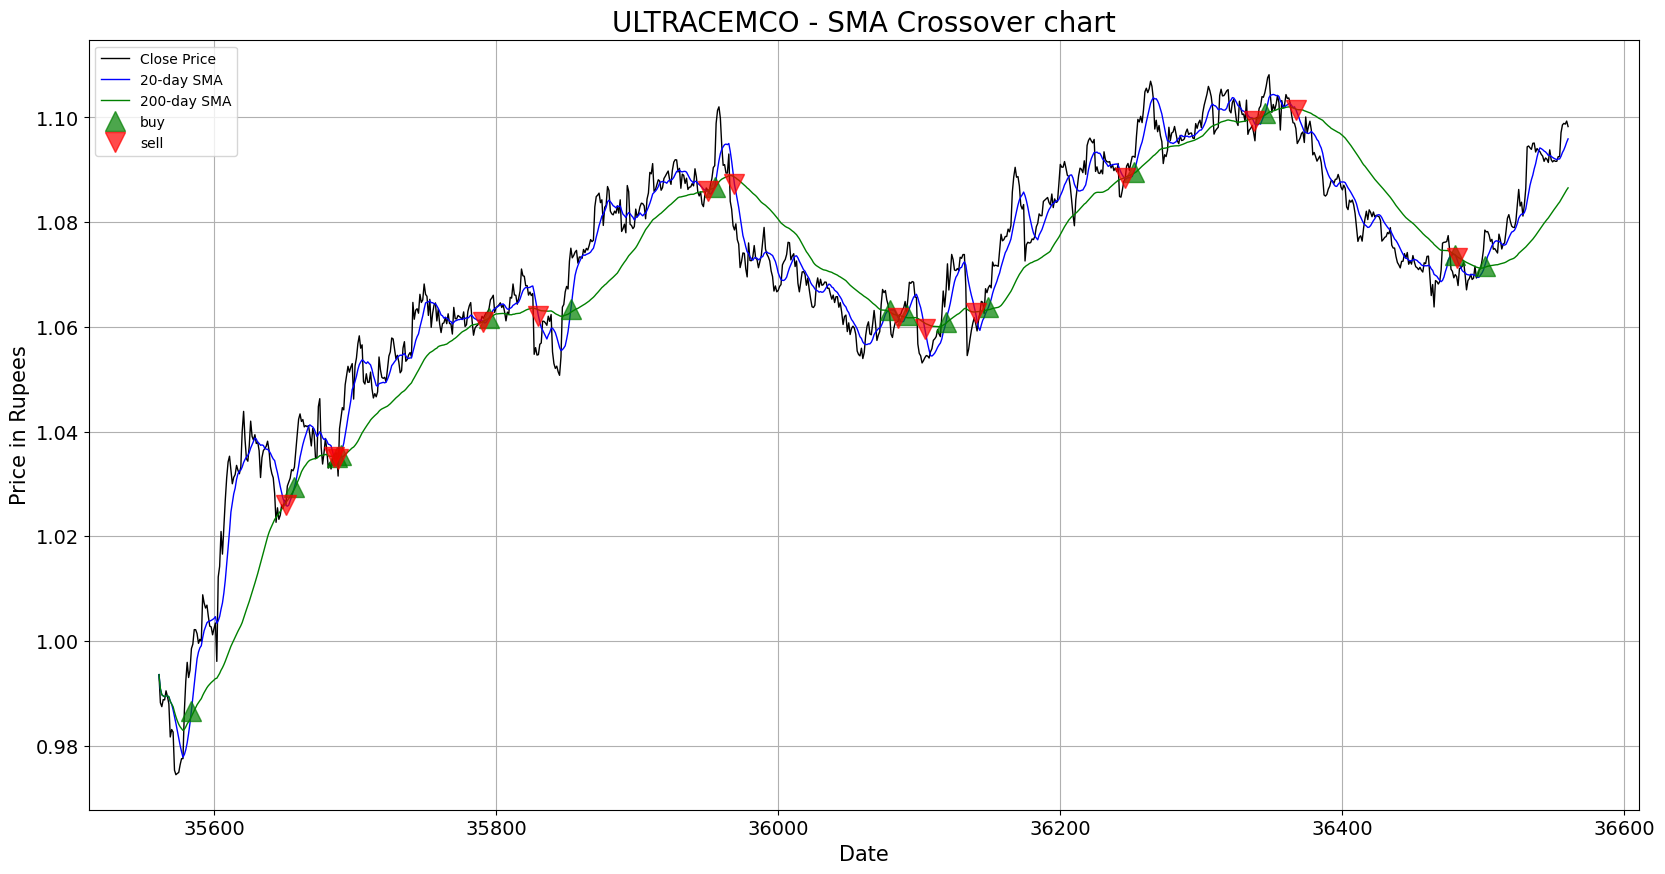

In [52]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages 
dt['close'].plot(color = 'k', lw = 1, label = 'Close Price')  
dt['20_SMA'].plot(color = 'b', lw = 1, label = '20-day SMA') 
dt['200_SMA'].plot(color = 'g', lw = 1, label = '200-day SMA') 

# plot 'buy' signals
plt.plot(dt[dt['Position'] == 1].index, 
         dt['20_SMA'][dt['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(dt[dt['Position'] == -1].index, 
         dt['20_SMA'][dt['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - SMA Crossover chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [32]:
# below is the logic when to start selling and when to buy
X = 0.05
dt['dec'] = np.where(dt['diff'] > X, 1, 0)
#dt['dec'] = np.where(dt['diff'] < X, -1, dt['dec'])
print("Total number of buy and Sell Signal \n",dt['dec'].value_counts())


Total number of buy and Sell Signal 
 dec
0    36352
1      209
Name: count, dtype: int64


In [ ]:

# converting dataframe to dataseries array
dataset = dt.values

# split into input (X) and output (Y) variables
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

# splitting to train dataset and testdataset
X, tx, Y, ty = train_test_split(X, Y, test_size=0.2)

# making the netral network model 
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compiling the model for binary output 
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# training the model for given data "X" features and "Y" binary output 			  
model.fit(X, Y,
          epochs=20,
          batch_size=100)

# evaluating the model 		  
score = model.evaluate(tx, ty, batch_size=100)
res = model.predict(tx)
# Creating the Confusion Matrix
#cm = confusion_matrix(ty, res)
plt.plot(res)
plt.show()
print("Score is: ",score,"\n",res,"\n")



In [23]:
##plt.plot(dt.close_5_ema, label='EMA_5')
##plt.plot(dt.close_30_ema, label='EMA_30')
##plt.plot(dt.close, label='Price')     
#print(dt.tail(1))
#print(dt.columns)
#print(dt[['diff_5_21']])

#drop row if there is any value zero within a row
#final = dt.dropna(axis=0, how="any")
#print(final.head())

def fillWithMean(df):
    return df.close.fillna(df.close.mean(), inplace=True)

dt = fillWithMean(dt)
#final = dt.fillna(dt.mean())

In [25]:
dt

In [ ]:

### open delta against next 2 day
##stock['open_2_d']
### open price change (in percent) between today and the day before yesterday
### 'r' stands for rate.
##stock['open_-2_r']
### CR indicator, including 5, 10, 20 days moving average
##stock['cr']
##stock['cr-ma1']
##stock['cr-ma2']
##stock['cr-ma3']
### KDJ, default to 9 days
##stock['kdjk']
##stock['kdjd']
##stock['kdjj']
### 2 days simple moving average on open price
##stock['open_2_sma']
### MACD
##stock['macd']
### MACD signal line
##stock['macds']
### MACD histogram
##stock['macdh']
### bolling, including upper band and lower band
##stock['boll']
##stock['boll_ub']
##stock['boll_lb']
### 6 days RSI
##stock['rsi_6']
### 12 days RSI
##stock['rsi_12']
### 10 days WR
##stock['wr_10']
### 6 days WR
##stock['wr_6']
### CCI, default to 14 days
##stock['cci']
### 20 days CCI
##stock['cci_20']
### TR (true range)
##stock['tr']
### ATR (Average True Range)
##stock['atr']
### DMA, difference of 10 and 50 moving average
##stock['dma']
### DMI
### +DI, default to 14 days
##stock['pdi']
### -DI, default to 14 days
##stock['mdi']
### DX, default to 14 days of +DI and -DI
##stock['dx']
### ADX, 6 days SMA of DX, same as stock['dx_6_ema']
##stock['adx']
### ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
##stock['adxr']
##
### TRIX, default to 12 days
##stock['trix']
### MATRIX is the simple moving average of TRIX
##stock['trix_9_sma']



